In [1]:
import numpy as np
import pandas as pd
import missingno as msno
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pickle as pkl

In [2]:
sns.set_style('dark')
%matplotlib inline

In [3]:
loan_train = pd.read_csv('data/loan-train.csv')
loan_test = pd.read_csv('data/loan-test.csv')

In [4]:
loan_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
loan_train.shape

(614, 13)

In [6]:
#check that you don't need to remove label 
loan_test.shape

(367, 12)

In [7]:
loan_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [8]:
loan_train_columns = loan_train.columns
loan_train_columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
loan_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<AxesSubplot:>

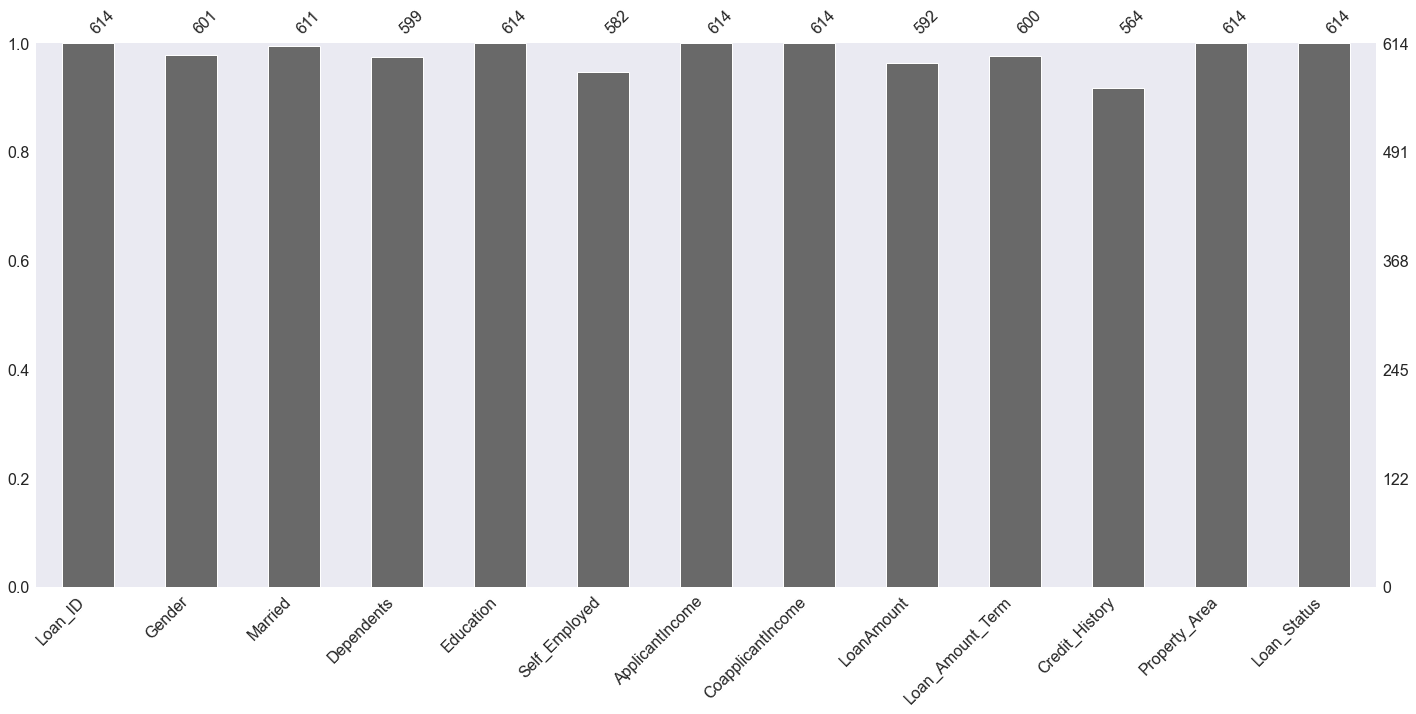

In [10]:
msno.bar(loan_train)

In [11]:
loan_train['Gender'].fillna(loan_train['Gender'].mode()[0], inplace=True)
loan_test['Gender'].fillna(loan_test['Gender'].mode()[0], inplace=True)

loan_train['Dependents'].fillna(loan_train['Dependents'].mode()[0], inplace=True)
loan_test['Dependents'].fillna(loan_test['Dependents'].mode()[0], inplace=True)

loan_train['Married'].fillna(loan_train['Married'].mode()[0], inplace=True)
loan_test['Married'].fillna(loan_test['Married'].mode()[0], inplace=True)

loan_train['Credit_History'].fillna(loan_train['Credit_History'].mean(), inplace=True)
loan_test['Credit_History'].fillna(loan_test['Credit_History'].mean(), inplace=True)

<AxesSubplot:>

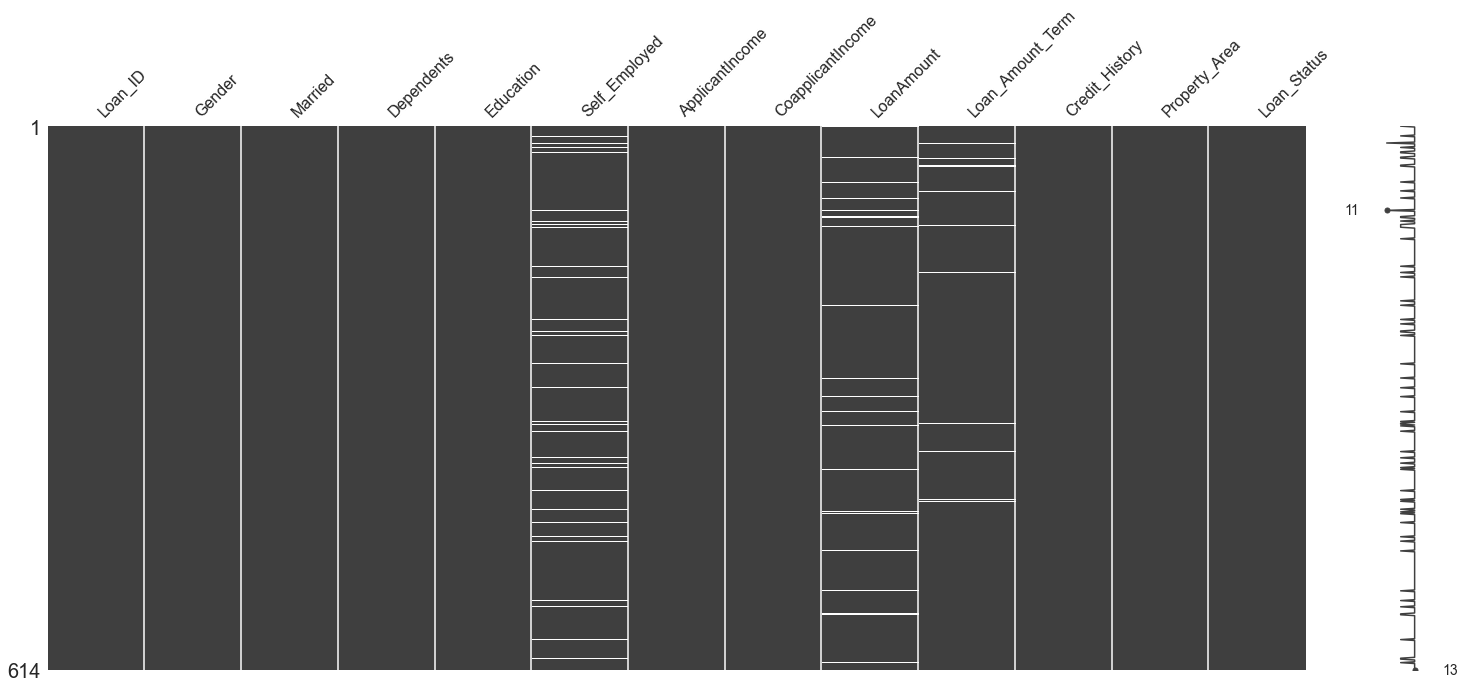

In [12]:
msno.matrix(loan_train)

<AxesSubplot:>

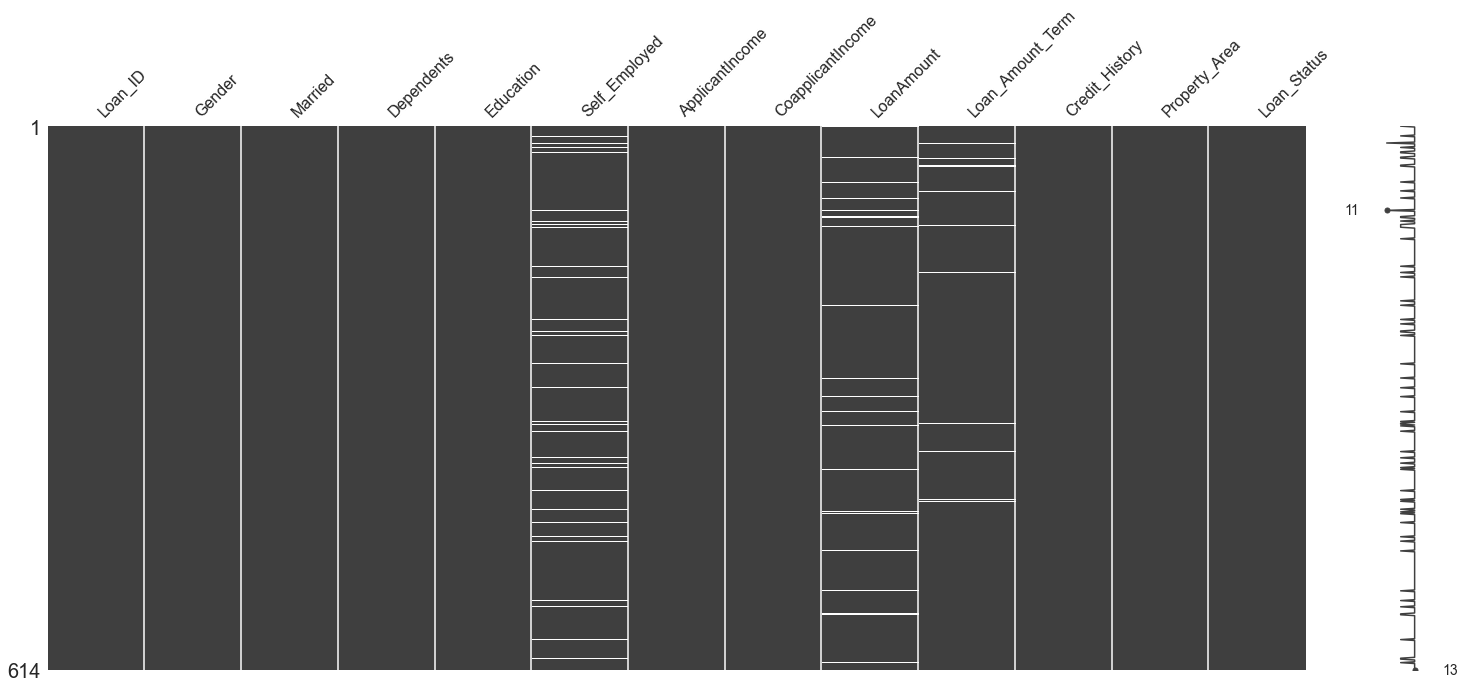

In [13]:
msno.matrix(loan_train)

In [14]:
feature_col = ['Property_Area','Education','Dependents']
le = LabelEncoder()
for col in feature_col:
    loan_train[col] = le.fit_transform(loan_train[col])
    loan_test[col] = le.fit_transform(loan_test[col])

In [15]:
loan_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,0,No,5849,0.0,NaN,360.0,1.0,2,Y
1,LP001003,Male,Yes,1,0,No,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,Male,Yes,0,0,Yes,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,Male,Yes,0,1,No,2583,2358.0,120.0,360.0,1.0,2,Y
4,LP001008,Male,No,0,0,No,6000,0.0,141.0,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,0,No,2900,0.0,71.0,360.0,1.0,0,Y
610,LP002979,Male,Yes,3,0,No,4106,0.0,40.0,180.0,1.0,0,Y
611,LP002983,Male,Yes,1,0,No,8072,240.0,253.0,360.0,1.0,2,Y
612,LP002984,Male,Yes,2,0,No,7583,0.0,187.0,360.0,1.0,2,Y


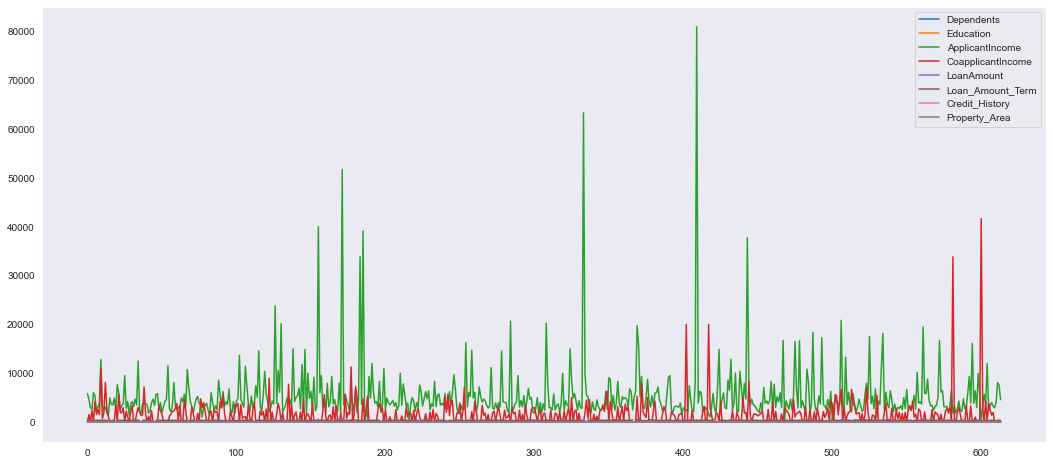

In [16]:
loan_train.plot(figsize=(18,8))

plt.show()

/Users/omar/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/omar/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


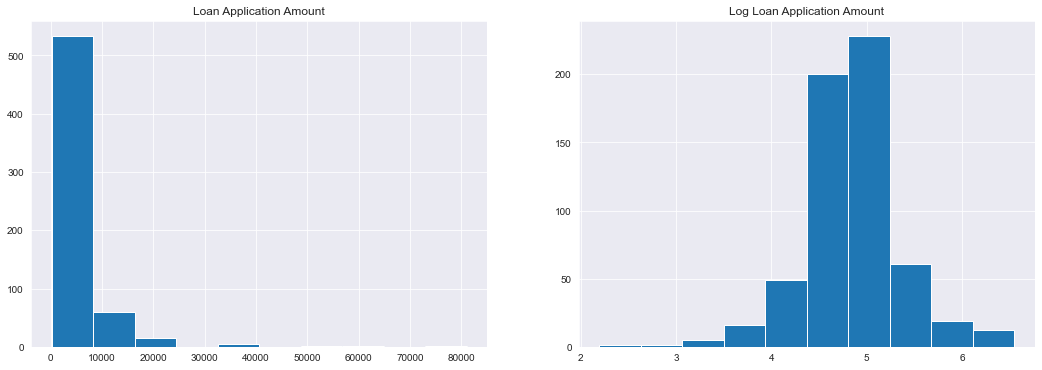

In [17]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)

loan_train['ApplicantIncome'].hist(bins=10)
plt.title('Loan Application Amount')

plt.subplot(1,2,2)
plt.grid()
plt.hist(np.log(loan_train['LoanAmount']))
plt.title('Log Loan Application Amount')
plt.show()

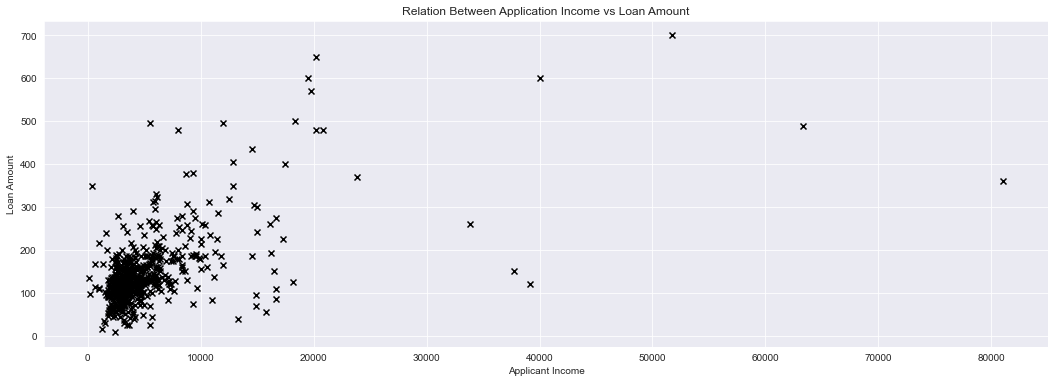

In [18]:
plt.figure(figsize=(18,6))
plt.title('Relation Between Application Income vs Loan Amount')

plt.grid()
plt.scatter(loan_train['ApplicantIncome'] , loan_train['LoanAmount'], c='k', marker='x')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.show()

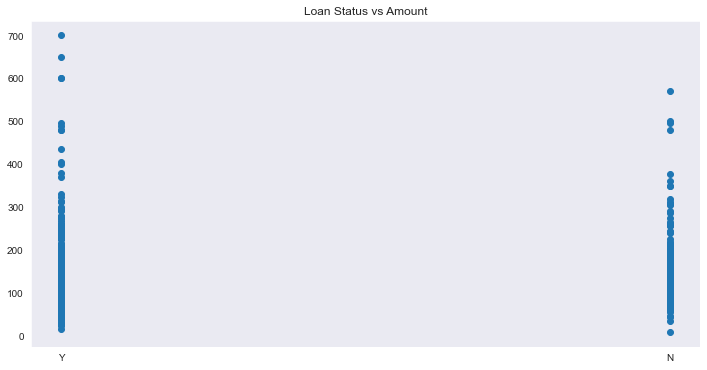

In [19]:
plt.figure(figsize=(12,6))
plt.scatter(loan_train['Loan_Status'], loan_train['LoanAmount'])
plt.title('Loan Status vs Amount')
plt.show()

In [20]:
loan_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,0,No,5849,0.0,NaN,360.0,1.0,2,Y
1,LP001003,Male,Yes,1,0,No,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,Male,Yes,0,0,Yes,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,Male,Yes,0,1,No,2583,2358.0,120.0,360.0,1.0,2,Y
4,LP001008,Male,No,0,0,No,6000,0.0,141.0,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,0,No,2900,0.0,71.0,360.0,1.0,0,Y
610,LP002979,Male,Yes,3,0,No,4106,0.0,40.0,180.0,1.0,0,Y
611,LP002983,Male,Yes,1,0,No,8072,240.0,253.0,360.0,1.0,2,Y
612,LP002984,Male,Yes,2,0,No,7583,0.0,187.0,360.0,1.0,2,Y


In [21]:
from sklearn.preprocessing import LabelBinarizer

def one_hot_encode_column(df, column_name):
    jobs_encoder = LabelBinarizer()
    jobs_encoder.fit(df[column_name])
    transformed = jobs_encoder.transform(df[column_name])
    ohe_df = pd.DataFrame(transformed)
    df = pd.concat([df, ohe_df], axis=1).drop([column_name], axis=1)
    df = df.rename(columns={0: column_name})
    return df

def flambda(x):
    if x == 'No':
        return 0
    else:
        return 1
        

loan_train = one_hot_encode_column(loan_train, 'Gender')
loan_train = one_hot_encode_column(loan_train, 'Married')
loan_train = one_hot_encode_column(loan_train, 'Loan_Status')
loan_test = one_hot_encode_column(loan_test, 'Gender')
loan_test = one_hot_encode_column(loan_test, 'Married')
loan_train['Self_Employed'] = loan_train['Self_Employed'].apply(lambda x: 0 if x == 'No' else 1)
loan_test['Self_Employed'] = loan_test['Self_Employed'].apply(lambda x: 0 if x == 'No' else 1)
loan_train

,Loan_ID,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Gender,Married,Loan_Status
0,LP001002,0,0,0,5849,0.0,NaN,360.0,1.0,2,1,0,1
1,LP001003,1,0,0,4583,1508.0,128.0,360.0,1.0,0,1,1,0
2,LP001005,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,1,1
3,LP001006,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,1,1
4,LP001008,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,2900,0.0,71.0,360.0,1.0,0,0,0,1
610,LP002979,3,0,0,4106,0.0,40.0,180.0,1.0,0,1,1,1
611,LP002983,1,0,0,8072,240.0,253.0,360.0,1.0,2,1,1,1
612,LP002984,2,0,0,7583,0.0,187.0,360.0,1.0,2,1,1,1


In [22]:
loan_train

,Loan_ID,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Gender,Married,Loan_Status
0,LP001002,0,0,0,5849,0.0,NaN,360.0,1.0,2,1,0,1
1,LP001003,1,0,0,4583,1508.0,128.0,360.0,1.0,0,1,1,0
2,LP001005,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,1,1
3,LP001006,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,1,1
4,LP001008,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,2900,0.0,71.0,360.0,1.0,0,0,0,1
610,LP002979,3,0,0,4106,0.0,40.0,180.0,1.0,0,1,1,1
611,LP002983,1,0,0,8072,240.0,253.0,360.0,1.0,2,1,1,1
612,LP002984,2,0,0,7583,0.0,187.0,360.0,1.0,2,1,1,1


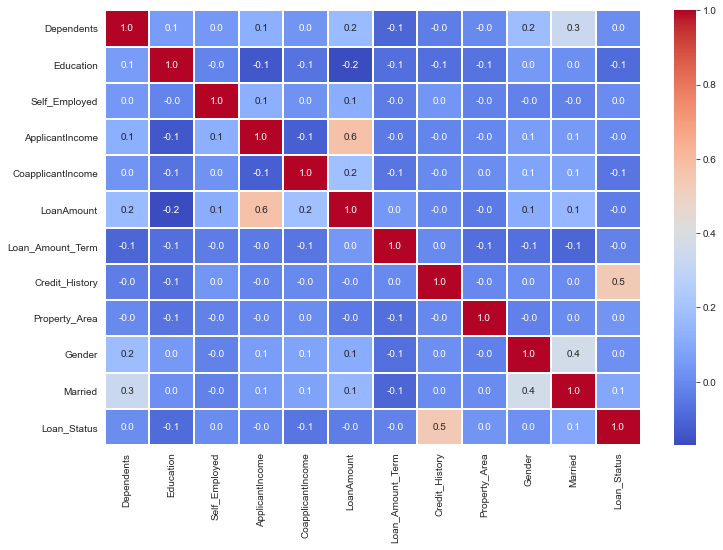

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(loan_train.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

In [24]:
logistic_model = LogisticRegression()

train_features = ['Credit_History', 'Education', 'Gender']

x_train = loan_train[train_features].values
y_train = loan_train['Loan_Status'].values

x_test = loan_test[train_features].values

In [25]:
logistic_model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
predicted = logistic_model.predict(x_test)
print('Coefficient of model :', logistic_model.coef_)
print('Intercept of model',logistic_model.intercept_)

Coefficient of model : [[ 3.316164   -0.3059193   0.09398266]]
Intercept of model [-1.98307795]


In [27]:
score = logistic_model.score(x_train, y_train)
print('accuracy_score overall :', score)
print('accuracy_score percent :', round(score*100,2))

accuracy_score overall : 0.8094462540716613
accuracy_score percent : 80.94


In [28]:
predict_test = logistic_model.predict(x_test)
print('Target on test data',predict_test) 

Target on test data [1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


## Model export

In [29]:
logistic_model.fit(x_train, y_train)
filename = 'models/loan_prediction_logestic_model.pkl'
pkl.dump(logistic_model, open(filename, 'wb'))

## Test Model

In [30]:
loaded_model = pkl.load(open(filename, 'rb'))
score = loaded_model.score(x_train, y_train)

print('accuracy_score overall :', score)
print('accuracy_score percent :', round(score*100,2))

accuracy_score overall : 0.8094462540716613
accuracy_score percent : 80.94
